In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.manifold import MDS
%matplotlib inline
from copy import deepcopy


In [2]:
data = np.load("mds-population.npz")
print(data['D']) # Distance matrix
print(data['population_list']) # List of populations

[[  0.  87.  12. ... 462. 559. 553.]
 [ 87.   0.  87. ... 210. 359. 285.]
 [ 12.  87.   0. ... 317. 401. 377.]
 ...
 [462. 210. 317. ...   0. 226. 173.]
 [559. 359. 401. ... 226.   0. 127.]
 [553. 285. 377. ... 173. 127.   0.]]
[b'Bantu' b'E. Afncan' b'Nilo-Saharan' b'W. African' b'San' b'Barter'
 b'Mbuti' b'Indian' b'Iranian' b'Near Eastern' b'Uralic' b'Ainu'
 b'Japanese' b'Korean' b'Mon Khmer' b'Thai' b'Dravidian' b'Mongol Tungus'
 b'Tibetan' b'Indonesian' b'Malaysian' b'Filipino' b'N. Turkic'
 b'S. Chinese' b'Basque' b'Lapp' b'Sardinian' b'Danish' b'English'
 b'Greek' b'Italian' b'C Amerind' b'Eskimo' b'Na-Dene' b'N. American'
 b'S. American' b'Chukchi' b'Melanesian' b'Micronesian' b'Polynesian'
 b'New Guinean' b'Australian']


In [3]:
data['D'].shape

(42, 42)

In [33]:
embedding = MDS(n_components=2)
D_transformed = embedding.fit_transform(data['D'])


/Users/yuekunwang/anaconda3/lib/python3.6/site-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


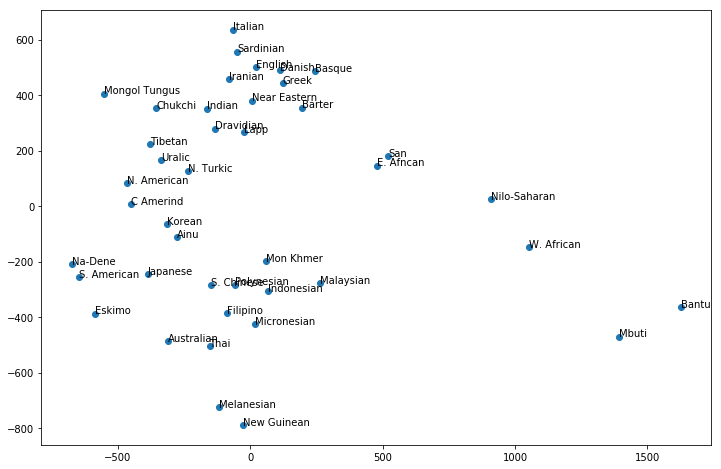

In [34]:
plt.figure(figsize = (12, 8))
plt.scatter(D_transformed[:,0], D_transformed[:,1])
for i, txt in enumerate(data['population_list']):
    a = txt.decode('UTF-8')
    plt.annotate(a, (D_transformed[:,0][i], D_transformed[:,1][i]))

In [35]:
# Euclidean Distance Caculator
def dist(a, b):
    return np.linalg.norm(a - b)

In [36]:
from scipy.spatial import distance_matrix as dm

dist(data['D'],D)


28471.592201489602

In [43]:
def loss(itr):
    embedding = MDS(n_components=itr)
    D_transformed = embedding.fit_transform(data['D'][:42])
    D = dm(D_transformed, D_transformed)
    return dist(data['D'],D)


/Users/yuekunwang/anaconda3/lib/python3.6/site-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"
/Users/yuekunwang/anaconda3/lib/python3.6/site-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"
/Users/yuekunwang/anaconda3/lib/python3.6/site-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"
/Users/yuekunwang/anacond

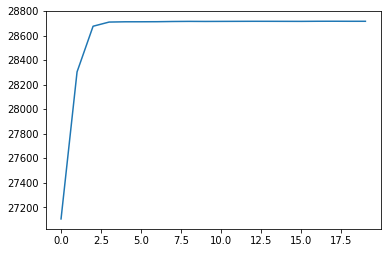

In [44]:
total_loss = []
for i in range(1,21):
    total_loss.append(loss(i))

plt.plot(total_loss)
    

['Mon Khmer' 'Thai' 'Indonesian' 'Malaysian' 'Filipino' 'S. Chinese'
 'Melanesian' 'Micronesian' 'Polynesian' 'New Guinean' 'Australian']
['E. Afncan' 'San' 'Barter' 'Indian' 'Iranian' 'Near Eastern' 'Dravidian'
 'Basque' 'Lapp' 'Sardinian' 'Danish' 'English' 'Greek' 'Italian']
['Bantu' 'Nilo-Saharan' 'W. African' 'Mbuti']
['Uralic' 'Ainu' 'Japanese' 'Korean' 'Mongol Tungus' 'Tibetan' 'N. Turkic'
 'C Amerind' 'Eskimo' 'Na-Dene' 'N. American' 'S. American' 'Chukchi']


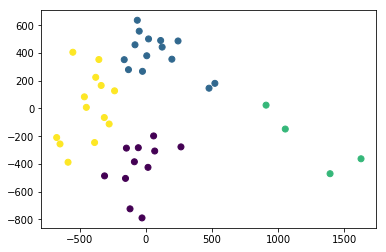

In [40]:
k = 4
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(D_transformed)
labels = kmeans.predict(D_transformed)
centroids = kmeans.cluster_centers_

for i in range(k):     
    groups = np.array([data['population_list'][j].decode(('UTF-8')) for j in range(len(D_transformed)) if labels[j] == i])
    print(groups)
plt.scatter(D_transformed[:, 0], D_transformed[:, 1], c=labels)

['Bantu' 'E. Afncan' 'Nilo-Saharan' 'W. African' 'San' 'Mbuti']
['Uralic' 'Ainu' 'Japanese' 'Korean' 'Mongol Tungus' 'Tibetan' 'N. Turkic'
 'C Amerind' 'Eskimo' 'Na-Dene' 'N. American' 'S. American' 'Chukchi']
['Barter' 'Indian' 'Iranian' 'Near Eastern' 'Dravidian' 'Basque' 'Lapp'
 'Sardinian' 'Danish' 'English' 'Greek' 'Italian']
['Mon Khmer' 'Thai' 'Indonesian' 'Malaysian' 'Filipino' 'S. Chinese'
 'Melanesian' 'Micronesian' 'Polynesian' 'New Guinean' 'Australian']


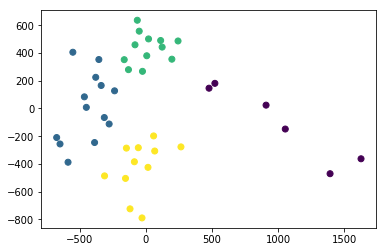

In [41]:
from sklearn.cluster import AgglomerativeClustering

cluster_hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')  
cluster_hc.fit_predict(D_transformed)

for i in range(k):     
    groups = np.array([data['population_list'][j].decode(('UTF-8')) for j in range(len(D_transformed)) if cluster_hc.labels_[j] == i])
    print(groups)
plt.scatter(D_transformed[:,0], D_transformed[:,1], c=cluster_hc.labels_)  

['Bantu' 'Nilo-Saharan' 'W. African' 'Mbuti']
['Mon Khmer' 'Thai' 'Indonesian' 'Malaysian' 'Filipino' 'S. Chinese'
 'Eskimo' 'Melanesian' 'Micronesian' 'Polynesian' 'New Guinean'
 'Australian']
['E. Afncan' 'San' 'Barter' 'Indian' 'Iranian' 'Near Eastern' 'Dravidian'
 'Basque' 'Lapp' 'Sardinian' 'Danish' 'English' 'Greek' 'Italian'
 'Chukchi']
['Uralic' 'Ainu' 'Japanese' 'Korean' 'Mongol Tungus' 'Tibetan' 'N. Turkic'
 'C Amerind' 'Na-Dene' 'N. American' 'S. American']


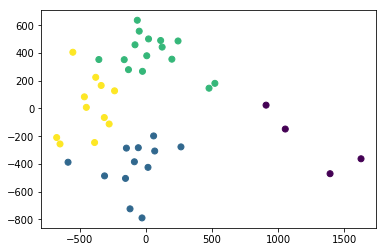

In [42]:
from pyclust import KMedoids

cluster_k = KMedoids(n_clusters=k)  
cluster_k.fit_predict(D_transformed)

for i in range(k):     
    groups = np.array([data['population_list'][j].decode(('UTF-8')) for j in range(len(D_transformed)) if cluster_k.labels_[j] == i])
    print(groups)
plt.scatter(D_transformed[:,0], D_transformed[:,1], c=cluster_k.labels_)  